In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import math 
import random
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.subplots as sp

import warnings
warnings.filterwarnings('ignore')

#### Графическое отображение

In [4]:
def calculate_z(dim, z_max):
    cnt = 0
    arr_z = []
    # arr_x_y = []
    while cnt != dim:
        x = np.random.normal(0, 1, size=1)
        y = np.random.normal(0, 1, size=1)
        z = x/y
        if z >0 and z<=z_max:
            arr_z.append(float(z))
            # arr_x_y.append([float(x),float(y)])
            cnt += 1
            
    # arr = np.random.uniform(0, 1, size=(n, dim))
    # z = box_muller(arr_z, arr)
    return np.array(arr_z)


In [5]:
# 2D для произвольного количества графиков (dim от 1 до 9)
def graph_multiple(arr, dimensions_list, names, colors):
    num_graphs = len(dimensions_list)
    rows = (num_graphs + 1) // 2  
    cols = 2  

  
    fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=names)

    for i, ((d_1, d_2), name, color) in enumerate(zip(dimensions_list, names, colors), start=1):
        row = (i + 1) // 2
        col = i % 2 if i % 2 != 0 else 2  

   
        fig.add_trace(go.Scatter(x=arr[:,d_1-1], y=arr[:,d_2-1], mode='markers', 
                                 marker=dict(size=8, line=dict(color='purple', width=1), color=color), 
                                 name=name),
                      row=row, col=col)

       
        fig.update_xaxes(title_text=f'dim = {d_1}', row=row, col=col, title_font=dict(size=14))
        fig.update_yaxes(title_text=f'dim = {d_2}', row=row, col=col, title_font=dict(size=14))
        fig.update_layout(
            autosize=False,
            width=900,
            height=900,
            plot_bgcolor='rgba(128, 128, 128, 0.2)',  
            paper_bgcolor='white'  
        )

    fig.show()



In [6]:
# 2D, 1 график
def graph_one_2D(arr, d_1, d_2, title: str, color: str):
    fig = go.Figure()
    

    
    fig.add_trace(go.Scatter(x=arr[:,d_1-1], y=arr[:,d_2-1], mode='markers', line=dict(color=color)))

    # for i in range(len(arr[:,d_2-1])):
    #     fig.add_annotation(
    #         x=arr[:,d_1-1][i], 
    #         y=arr[:,d_2-1][i]-0.02,
    #         text=f'({round(arr[:,d_1-1][i], 2)}, {round(arr[:,d_2-1][i], 2)})', 
    #         showarrow=False, 
    #         font=dict(color='black', size=10)
    #     )

    fig.update_layout(
        title=title,
        xaxis_title=f'dim={d_1}',
        yaxis_title=f'dim={d_2}',
        width=500,
        height=500,
        plot_bgcolor='rgba(128, 128, 128, 0.2)' 
    )
    
    fig.show()


In [7]:
# 3D график
def graph_3d(arr, d_1, d_2, d_3):
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=arr[:,d_1-1], y=arr[:,d_2-1], z=arr[:,d_3-1], mode='markers', 
                             marker=dict(color='lightgreen', size=5, 
                                         line=dict(color='purple', width=0.5)), 
                             name='Data'))

    fig.update_layout(
        scene=dict(
            xaxis_title=f'dim = {d_1}',
            yaxis_title=f'dim = {d_2}',
            zaxis_title=f'dim = {d_3}',
        ),
        width=800,
        height=800,
        scene_aspectmode='cube',
        plot_bgcolor='rgba(128, 128, 128, 0.2)',  
        paper_bgcolor='white'
    )

    fig.show()


#### Вспомогательные функции

In [8]:
def b_radical_ary(base, n):
    result = 0
    f = 1
    while n > 0:
        f = f / base
        result += f * (n % base)
        n = n // base
    return result

############################## # Halton # ################################## 
def van_der_corput_element(base, n_i):
    return b_radical_ary(base, n_i)

# создание простого числа для массива базисов
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True
    
# генерация простых чисел для базисов
def generate_prime_numbers_array(N):
    prime_numbers = []
    num = 2
    while len(prime_numbers) < N:
        if is_prime(num):
            prime_numbers.append(num)
        num += 1
    return prime_numbers

############################## # Kronecker # ################################## 

def generate_primes(n0, count): 
    primes = []
    n = n0
    while len(primes) < count:
        if sym.isprime(n):
            primes.append(n)
        n += 1 
    return primes

################################## # Fore # ################################## 

# определение базы (base) для расчета последовательности Форма
def find_base(dim):
    prime_arr = list(sym.primerange(dim, dim + 100)) # простые числа
    base = prime_arr[0] # base - простое число равное или больше числу измерений
    return base

# переводит маассив чисоле с базой 10 в любую другую базу
def arr_base2(arr, base):
    arr_b = []
    for num in arr:
        num_new = ''
        if num == 0: arr_b.append(0)
        else:
            while num > 0:
              ost = num % base
              num_new += str(ost)
              num //= base
            num_new = int(num_new[::-1])
            arr_b.append(num_new)
    return arr_b

# создает биноминальную матрицу для dim = 1
def C_matrix_fst_dim(r):
    C_m = np.zeros((r, r), dtype=float)
   
    for n in range(r): 
        for m in range(r):
            if m < n:
                part_1 = 0
            else:
                part_1 =  math.factorial(m)/ math.factorial(m-n) / math.factorial(n)
            part_2 = 1**(n-m)
            C_m[n][m] = part_1 * part_2
    return C_m
    

def a_matrix_create(num, len_max_num):
    a_m = []
    num = str(num)[::-1]
    delta = len_max_num - len(num)
    a = ''
    for i in range(len(num)):
        a += num[i]
    a += '0' * delta

    for i in range(len(a)):
        a_m.append((int(a[i])))
        
    return a_m


In [9]:
################################## # Sobol # ################################## 
# создание матриц V
def V_matrix_creat(mm):
    mm = mm[::-1]
    
    # перевод m в двоичную систему счисления
    mm_b =[]
    for num in mm:
        mm_b.append(bin(num)[2::])

        # v_{j} = \frac{m_{j}}{2^{j}}
        #попробовать реализовать через эту формулу
    
    # задаем значение отступов слева (приводем к треугольнумо виду) 
    mat0 = []
    for i in range(len(mm_b)):
        num = mm_b[i]
        mat0.append('0'*i +num)

    len_max = len(str(max(mat0, key=lambda x: len(str(x)))))
   
    # выравниваем оступы справа (приводим массивы к единому размеру)
    for i in range(len(mat0)):
        col = mat0[i]
        delta = len_max - len(col) 
        mat0[i] = col + '0'* delta
        
    mat0 = mat0[::-1]
    
    # расположение значений в матрицуу V
    V_mat = np.zeros(shape=(len_max, len_max))
    for i in range(len(mat0)):
        temp = []
        for j in range(len(mat0[i])):
            V_mat[j][i] = int(mat0[i][::-1][j]) # [x][y] x - row;  y - colume 
    
    return V_mat



#####################################################
def a_matrix_creat(num, len_max_num):
    a_m = []
    num = str(num)[::-1]
    delta = len_max_num - len(num)
    a = ''
    for i in range(len(num)):
        a += num[i]
    a += '0' * delta

    for i in range(len(a)):
        a_m.append((int(a[i])))
        
    return a_m


#####################################################
def num_base_2(s, a):
    
    num_a = ''
    while a > 0:
      ost = a % 2
      num_a += str(ost)
      a //= 2

    delta = s - len(str(num_a)) - 1
    num_a = '1' + '0' * delta  + num_a[::-1] + '1'
    # print(num_a)
    # print(num_a_2)
    return num_a


#####################################################
def calculate_m_j(s, a, m_i, j):

    a = num_base_2(s, a)[::-1]
   
    m_j = 0
    for i in range(s):
        if i != (s-1):
            m_j ^= (2 ** (i + 1)) * int(a[i]) * m_i[j - (i + 1)]
        else:
            m_j ^= ((2 ** (i + 1)) * int(a[i]) * m_i[j-(i + 1)]) ^ m_i[j-(i + 1)]
    return m_j


#####################################################
def create_m_i(dim, len_max_num):
    dic_V = {}
    dic_V[0] = np.eye(len_max_num)
    dir_file = 'C:/Users/Vlada/Desktop/Sirius/NIR/code/data_sobol.21201'
    with open(dir_file, 'r') as infile:
        infile.readline()  # Skipping the first line
        for d in range(dim):
                 
            line = infile.readline().split()
            d, s, a = map(int, line[:3])
            
            m_i = list(map(int, line[3:]))
            
            for j in range(len(m_i), len_max_num):
                m_i.append(calculate_m_j(s, a, m_i, j))
            
    
            dic_V[d-1] = V_matrix_creat(m_i)
            
    return dic_V

#### Функция Van der corput

In [10]:
def van_der_corput(base, n0, n):
    sec = []
    for i in range(n0, n):
        sec.append(van_der_corput_element(base, i))
    return np.array(sec)

#### Функция Halton

In [12]:
def halton(dim, n0,  n):
    sec = []    
    base = generate_prime_numbers_array(dim)
    for i in range(len(base)):  
        sec.append(van_der_corput(base[i], n0, n))
    return np.array(sec).T

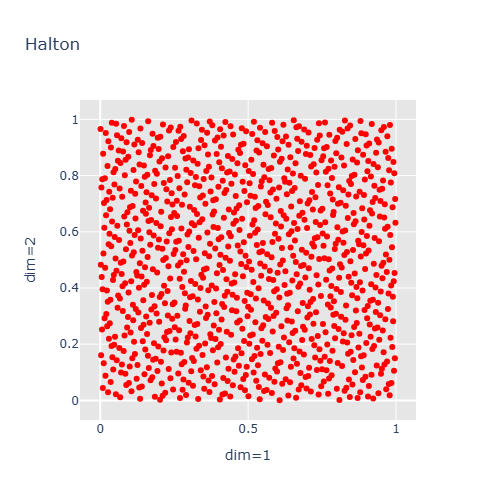

In [13]:
dic =  halton(3, 1,  1000)
graph_one_2D(dic, 1, 2, 'Halton', 'red')

#### Функция Hammersley

In [14]:
def hammersley(dim, n0,  n):
    sec1 = np.zeros((n-n0,1)) 
    dim -= 1
    for i in range(n0, n-n0):
        sec1[i] = (i)/(n-n0) #расчет первой координаты для множества точек Хаммерсли
    sec2 = halton(dim, n0,  n)
    
    return np.concatenate((sec1, sec2), axis=1)

# hammersley(3, 0,  10)

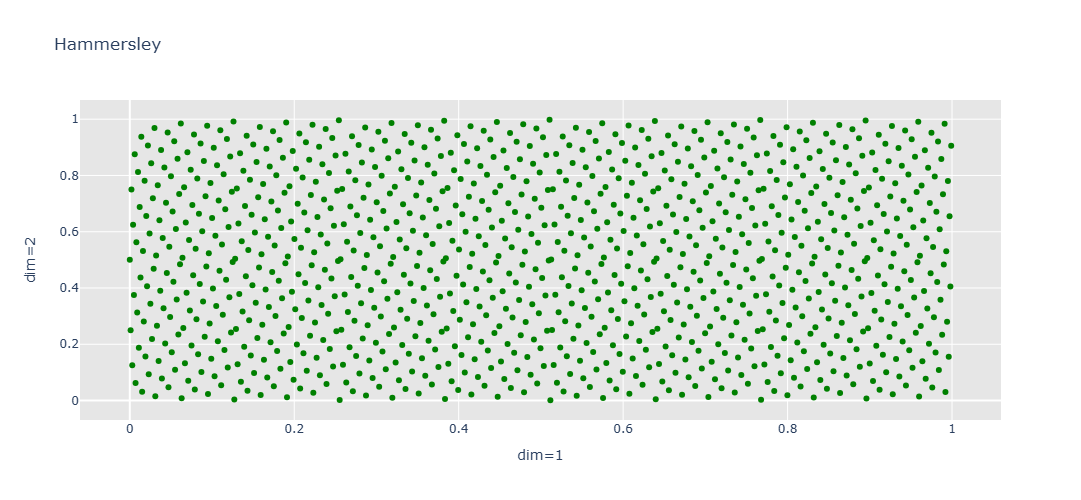

In [15]:
dic =  hammersley(3, 1,  1000)
graph_one_2D(dic, 1, 2, 'Hammersley', 'green')

#### Функция Kroncker

In [16]:
def kroncker(dim, n0, n):

    sqrt_primes = [] # base == j and number(№) of dimention
    primes = generate_primes(n0, dim)
    for num in primes:
        sqrt_primes.append(np.sqrt(num))
    
    arr = np.array(range(n0,n))    

    sec = [[] for _ in range(dim)]
    for num in arr:
        for j in range(len(sqrt_primes)):
            sec[j].append(round((num * sqrt_primes[j]) % 1, 10))

    sec = np.array(sec)
    return sec.T

# kroncker(3, 0, 5)

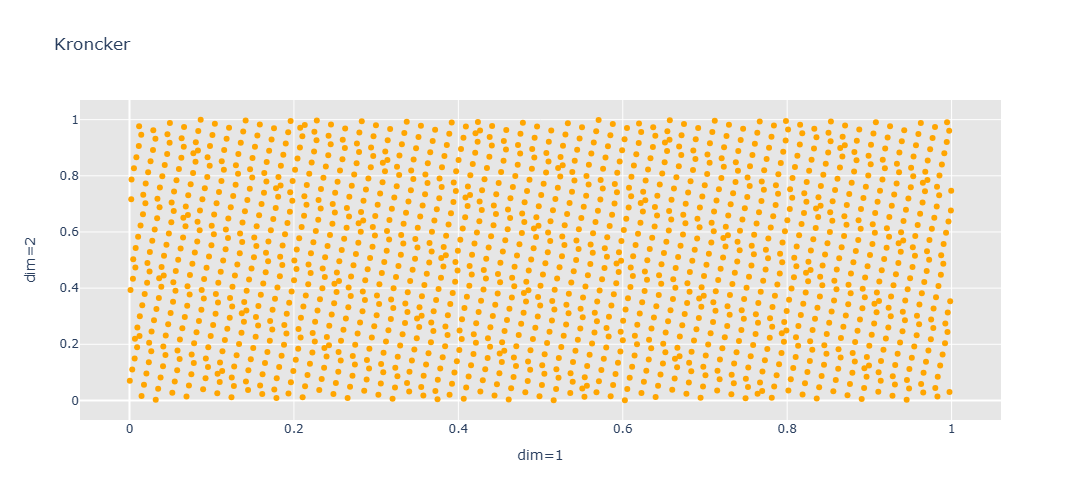

In [17]:
dic =  kroncker(3, 1,  1500)

graph_one_2D(dic, 1, 2, 'Kroncker', 'orange')

#### Функция Faure

In [18]:
def faure(dim, n0, n, base):
    n0 = 1
    dic = {}

    if base < dim:
        base = find_base(dim) 
    arr0 = generate_primes(n0, n)
    
    if base == 10:
        arr_b = arr0
    else:
        arr_b = arr_base2(arr0, base)
        
    len_max_num = len(str(max(arr_b, key=lambda x: len(str(x)))))

    # создаем словарь с матрицами С для всех dim
    keys = np.array(range(0, dim))
    dic_c = dict.fromkeys(keys)
    dic_c[0] = np.eye(len_max_num)
    dic_c[1] = C_matrix_fst_dim(len_max_num) # r = len_max_num
    for d in keys:
        if d > 1:
            dic_c[d] = np.dot(dic_c[1], dic_c[d-1])

    # создаем словарь с векторами a для всех dim
    dic_a = dict.fromkeys(arr0)
    for k in range(len(arr_b)):
        dic_a[arr0[k]] = a_matrix_create(arr_b[k], len_max_num)

    dic_y = dict.fromkeys(np.array(range(1, dim+1)))

    for dim in keys:
        y_temp = []
        for num in arr0:
            proiz = np.dot(dic_c[dim], dic_a[num])

            proiz_base = []
            for i in range(len(proiz)):
                i_mod = (proiz[i] % (base))
                
                proiz_base.append(i_mod / base**(i+1))
    
            y_temp.append(sum(proiz_base))
        dic_y[dim+1] = y_temp

    dic_y = np.array(list(dic_y.values()))

    return dic_y.T

# faure(3, 0, 5)

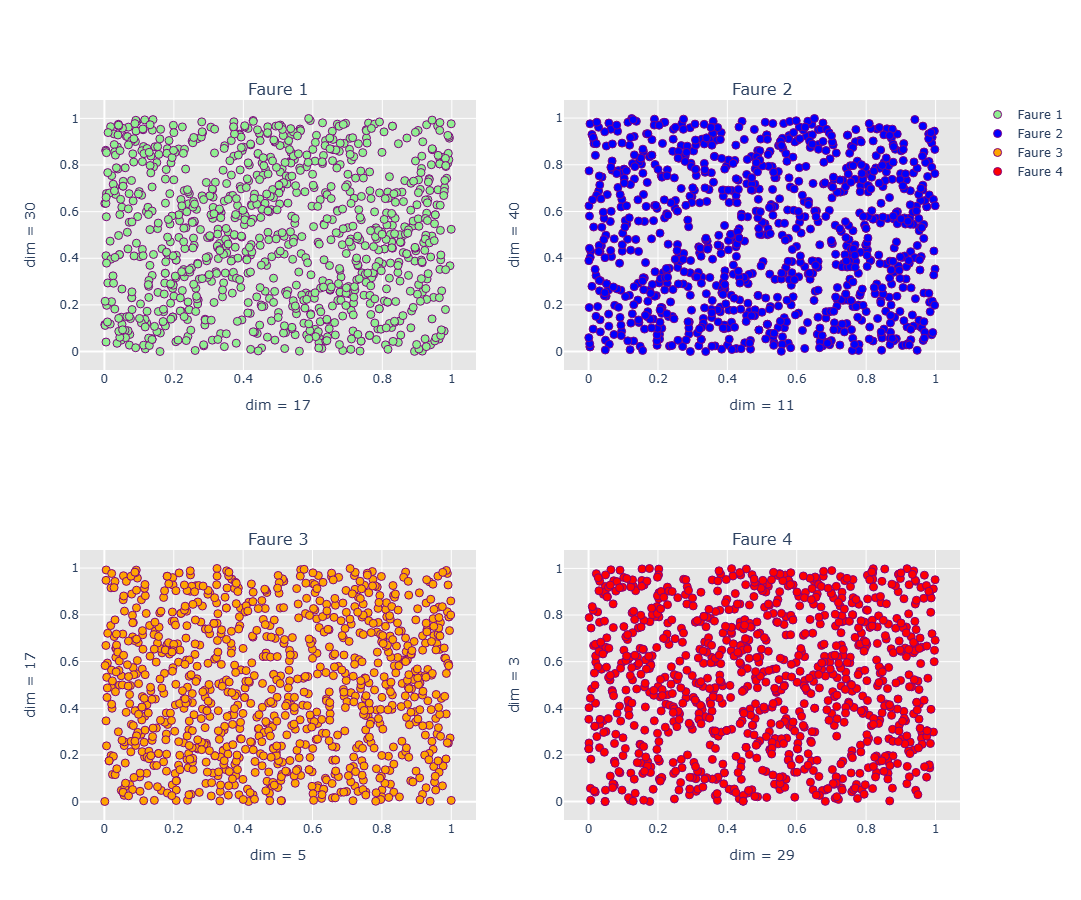

In [19]:
arr = faure(40,1, 1000, 1)
dimensions_list = [(17, 30), (11, 40), (5, 17), (29,3)]
names = ['Faure 1', 'Faure 2', 'Faure 3', 'Faure 4']
colors = ['lightgreen', 'blue', 'orange', 'red']
# sobol_graph_multiple(dic, dimensions_list, names, colors)
graph_multiple(arr, dimensions_list, names, colors)


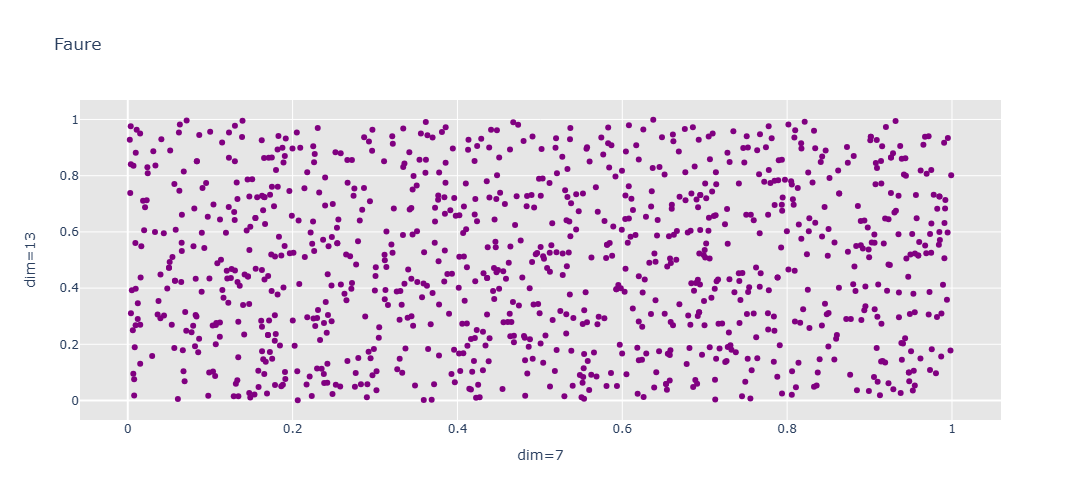

In [20]:
dic =  faure(27, 1,  1000, 7)
graph_one_2D(dic, 7, 13, 'Faure', 'purple')

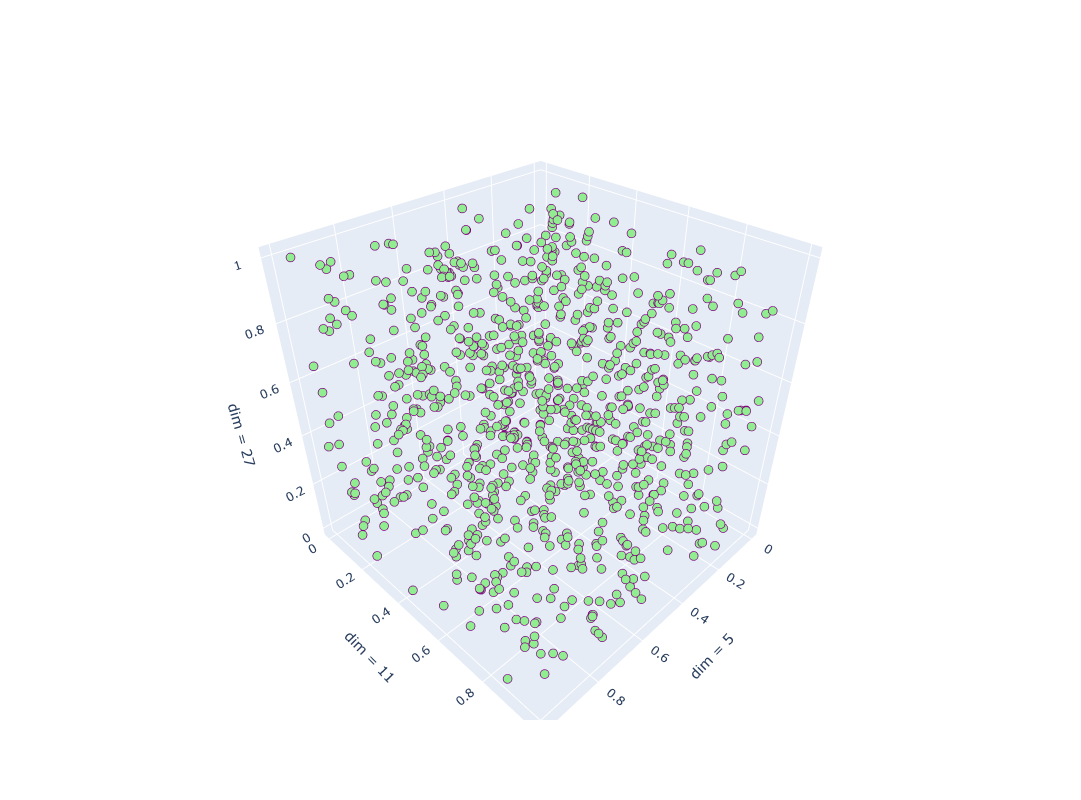

In [21]:
arr =  faure(27, 1,  1000, 7)
graph_3d(arr, 5, 11, 27)

#### Функция Sobol

In [22]:
def sobol(dim, n0, n):
    dic = {}

    base = 2
    # arr0 = np.array(range(n0,n + 1))
    arr0 = generate_primes(n0, n+1)
    arr_b = arr_base2(arr0, 2)
    
    len_max_num = len(str(max(arr_b, key=lambda x: len(str(x)))))
    
    # создаем словарь с векторами a для всех dim
    dic_a = dict.fromkeys(arr0)
    for k in range(len(arr_b)):
        dic_a[arr0[k]] = a_matrix_creat(arr_b[k], len_max_num)
                                  
    # V matrix
    dic_V = create_m_i(dim, len_max_num)
  
    # расчет y
    dic_y = dict.fromkeys(np.array(range(1, dim+1)))

    for V in range(len(dic_V)):
        y_temp = []
        for key in dic_a:
            proiz = np.dot(dic_V[V], dic_a[key]) # реализовать побитовое умпожение
            
            proiz_base = []
            for i in range(len(proiz)):
                i_mod = (proiz[i] % 2)
                proiz_base.append(i_mod / 2**(i+1))
    
            y_temp.append(sum(proiz_base))
        dic_y[V+1] = y_temp
            
    
    dic_y = np.array(list(dic_y.values()))
    
    return dic_y.T

# sobol(50, 1, 31)

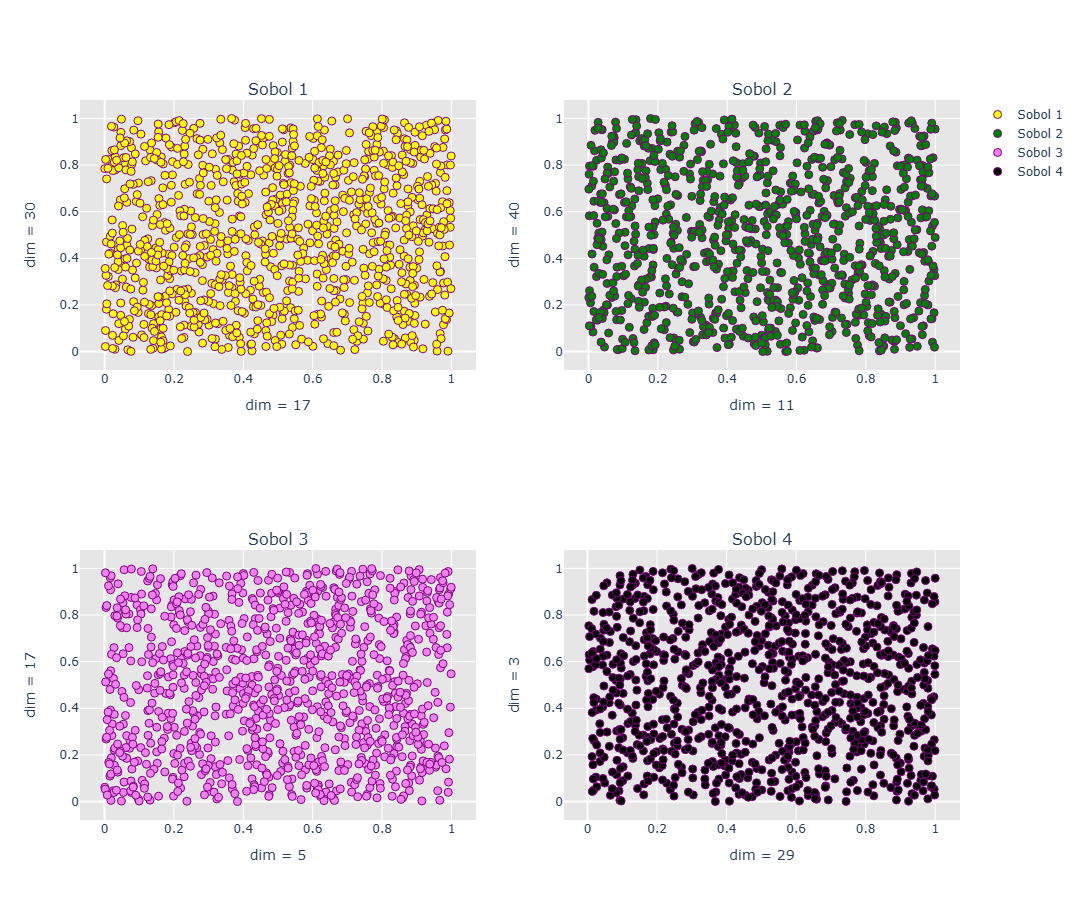

In [23]:
arr = sobol(40,1, 1000)
dimensions_list = [(17, 30), (11, 40), (5, 17), (29,3)]
names = ['Sobol 1', 'Sobol 2', 'Sobol 3', 'Sobol 4']
colors = ['yellow', 'green', 'violet', 'black']
# sobol_graph_multiple(dic, dimensions_list, names, colors)
graph_multiple(arr, dimensions_list, names, colors)